In [1]:
# risky bank loan


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,recall_score,precision_score,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier



In [4]:
c = pd.read_csv('../data/credit.csv')
c.head(2)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker,default
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,skilled employee,1,yes,yes,1
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,skilled employee,1,none,yes,2


In [6]:
c.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_length       0
installment_rate        0
personal_status         0
other_debtors           0
residence_history       0
property                0
age                     0
installment_plan        0
housing                 0
existing_credits        0
job                     0
dependents              0
telephone               0
foreign_worker          0
default                 0
dtype: int64

In [8]:
c.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_length       object
installment_rate         int64
personal_status         object
other_debtors           object
residence_history        int64
property                object
age                      int64
installment_plan        object
housing                 object
existing_credits         int64
job                     object
dependents               int64
telephone               object
foreign_worker          object
default                  int64
dtype: object

In [62]:
x = np.array([[1,2,3],[4,5,6]])
x.shape

(2, 3)

In [63]:
x.reshape(-1,1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [64]:
x.shape

(2, 3)

In [9]:
# here target column is in integer from so we will assign all the columns to cols variable
#except default
c.columns


Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_length', 'installment_rate',
       'personal_status', 'other_debtors', 'residence_history', 'property',
       'age', 'installment_plan', 'housing', 'existing_credits', 'job',
       'dependents', 'telephone', 'foreign_worker', 'default'],
      dtype='object')

In [11]:
cols = ['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_length', 'installment_rate',
       'personal_status', 'other_debtors', 'residence_history', 'property',
       'age', 'installment_plan', 'housing', 'existing_credits', 'job',
       'dependents', 'telephone', 'foreign_worker']

In [16]:
le = LabelEncoder()
c[cols] = c[cols].apply(LabelEncoder().fit_transform)

In [18]:
c



,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker,default
0,1,2,0,7,142,4,3,3,3,2,...,2,48,1,1,1,1,0,1,1,1
1,0,29,4,7,770,2,1,1,1,2,...,2,3,1,1,0,1,0,0,1,2
2,3,8,0,4,390,2,2,1,3,2,...,2,30,1,1,0,3,1,0,1,1
3,1,26,4,5,848,2,2,1,3,1,...,0,26,1,0,0,1,1,0,1,1
4,1,17,1,1,734,2,1,2,3,2,...,3,34,1,0,1,1,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,8,4,5,310,2,2,2,1,2,...,2,12,1,1,0,3,0,0,1,1
996,1,21,4,2,661,2,1,3,0,2,...,0,21,1,1,0,0,0,1,1,1
997,3,8,4,7,69,2,3,3,3,2,...,1,19,1,1,0,1,0,0,1,1
998,1,27,4,7,332,2,1,3,3,2,...,3,4,1,0,0,1,0,1,1,2


In [21]:
x = c.drop('default',axis=1)
y= c['default']

In [32]:
print(x.shape)
print(y.shape)

(1000, 20)
(1000,)


In [ ]:
x,y

In [37]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=50)

In [38]:
rf=  RandomForestClassifier(
    criterion='entropy',
    max_depth  =10,
    n_estimators=280)

In [40]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=280)

In [49]:
rf.predict(xtrain)

array([2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1,
       2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1,

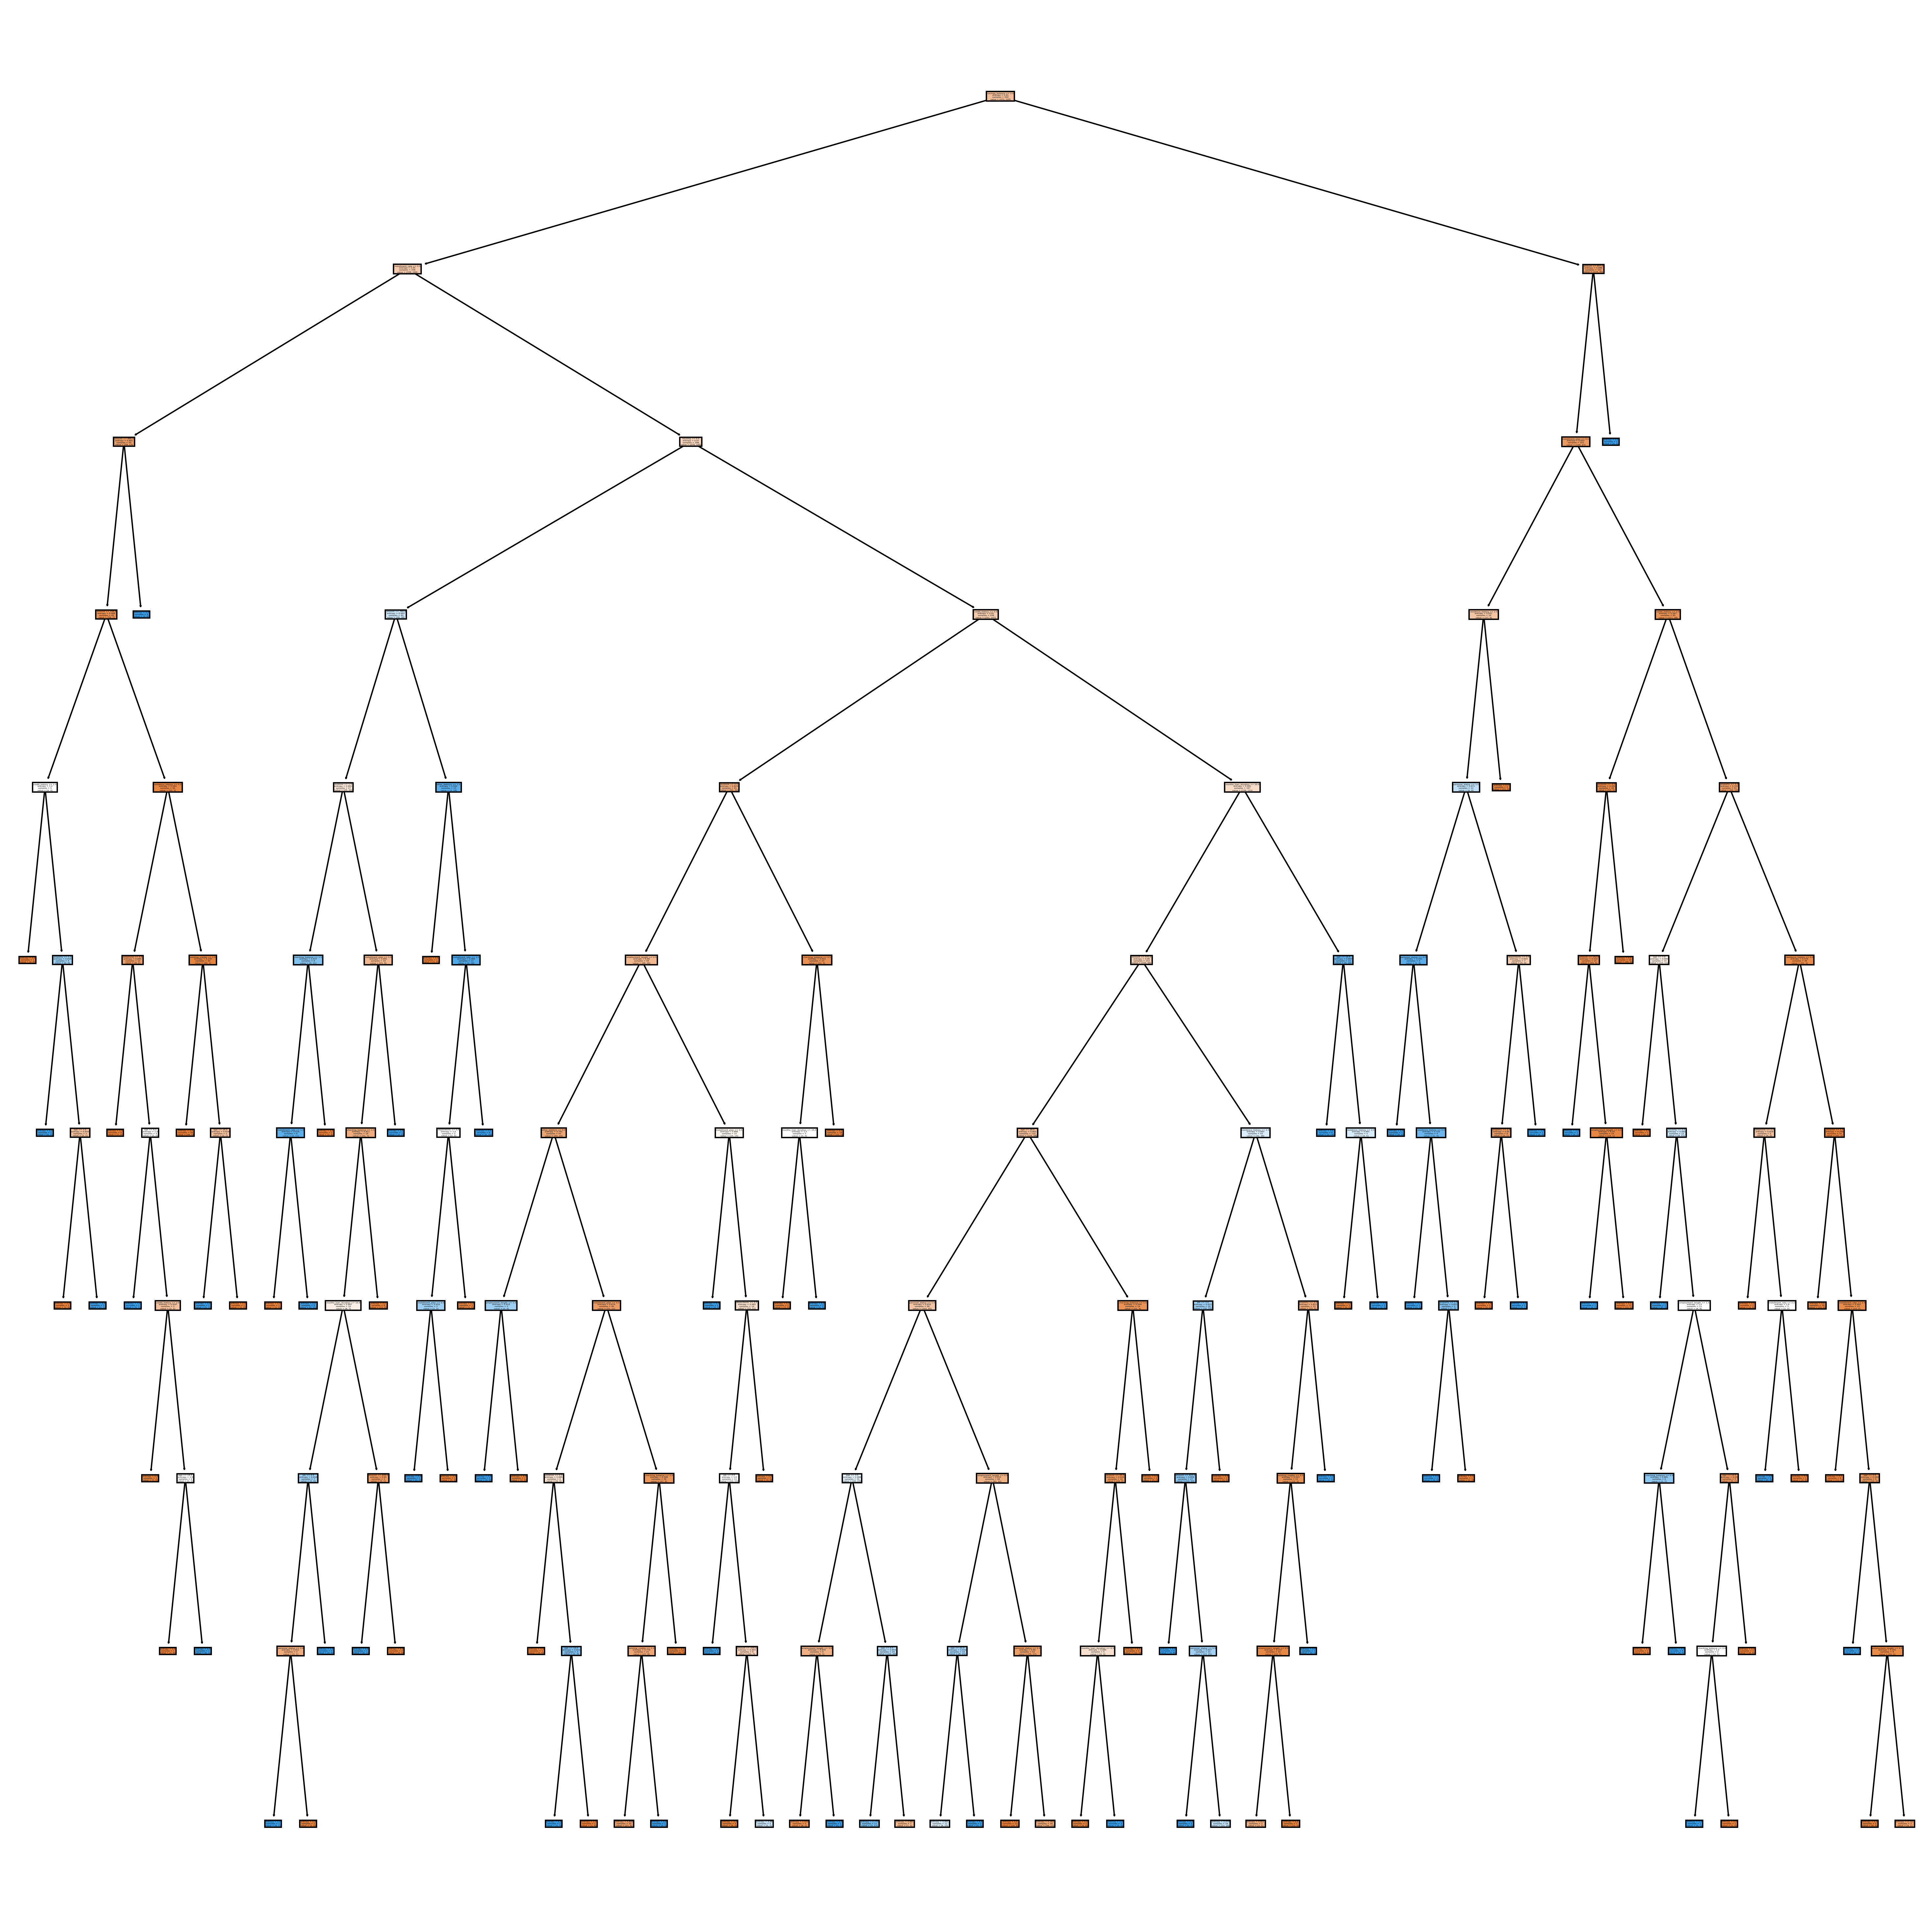

In [47]:
fig = plt.subplots(figsize=(25,25),dpi=300)
tree.plot_tree(rf.estimators_[10],feature_names=xtrain.columns, filled=True);


In [52]:
prediction = rf.predict(xtest)
prediction

array([1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1], d

In [55]:
confusion_matrix(ytest,prediction)

array([[192,  15],
       [ 64,  29]], dtype=int64)